# Performance and Equity of Geolocation Data for Lapse Prediction in

Alcohol Use Disorder

Claire Punturieri (Department of Psychology, University of Wisconsin-Madison)  
John J. Curtin (Department of Psychology, University of Wisconsin-Madison)  
October 24, 2024

We developed a machine learning model that utilizes geolocation data to predict next-day lapse back to alcohol use. Context- and movement-based features were calculated as raw and change scores for feature engineering. Features were designed to represent clinically-meaningful lapse precursors. One hundred and forty six participants (50.7% male; mean age = 40.9; 87% White, 97.3% Non-Hispanic) in early recovery (1–8 weeks of abstinence) from alcohol use disorder provided continuous geolocation data for up to three months. Inner folds from 10 x 30 grouped, nested cross-validation were used to select and evaluate the best performing model. The median area under the receiver operating characteristic curve was .71 across 300 validation sets. Three top performing features emerged: time spent at risky locations, time spent across various types of places, and time spent at locations where alcohol is available. Fairness analyses comparing auROCs across race/ethinicty, age, sex at birth, and income were used to identify the likelihood of differential performance of our model between subgroups within each class. All models exhibited differential performance across subgroups of race/ethnicity, sex at birth, age, and income, such that model performance was worse for non-white, female, and older participants, as well as those below the poverty line. This study represents foundational work carried out to explore the predictive signal, important features, and algorithmic fairness of this model for future integration into a continuous risk monitoring and support system designed to identify high lapse risk periods and relevant supports for individuals in recovery.

## Introduction

About 1 in 10 adults in the United States met diagnostic criteria for alcohol use disorder (AUD) in 2022 \[@samhsacenterforbehavioralhealthstatisticsandqualityHighlights2022National2022\]. Of these individuals, many will experience AUD as a chronic, relapsing disorder marked by periods of recovery interspersed with returns back to harmful use \[@mckayTreatingAlcoholismChronic2011a; @moosRatesPredictorsRelapse2006\]. Lapses, or single instances of goal-inconsistent use, necessarily precede a relapse period \[@witkiewitzRelapsePreventionAlcohol2004b\]. This temporal precedence, combined with their clear definition and ease of observation, make them a suitable target for early intervention. Yet, even when someone anticipates an oncoming lapse, it may be difficult to pinpoint its specific driving forces. Moreover, the precipitants to a lapse will vary between and within people. These two factors can make maintaining recovery goals difficult and motivate the need for lifelong monitoring and support.

One way to provide ongoing assistance to individuals in recovery is through the development of a continuous risk monitoring and support system. An ideal version of this system consists of two core components. First, the system must be able to collect risk-relevant data with sufficient temporal precision. Next, the system should communicate factors driving (or mitigating) this risk to provide personalized recommendations (e.g., behavior modification or continuation, seeking out supports). Not only does this system need to be developed outright, it also needs to be designed to be both sustainable (i.e., can be used over an extended period of time) and scalable (i.e., can be effectively used by a maximal amount of people). These goals can be accomplished by integrating personal sensing data and machine learning within such a system.

Personal sensing data are data derived via embedded sensors in technology such as smartphones, smartwatches, or wearables \[@mohrPersonalSensingUnderstanding2017a\], and can also include information collected from applications downloaded onto one of these devices like ecological momentary assessment (EMA) surveys. Other examples of these data are location information, text messages, and social media behavior. Because these devices are already ubiquitous within our day-to-day lives, these data can viably be collected unobtrusively and continuously for clinical purposes. Many of these data do not require individuals to significantly change their behavior or routines in any way, making data collection both sustainable and ecologically valid. Machine learning models can then uncover relationships between antecedent behaviors present in these data and true lapse events. Importantly, the use of machine learning models enables scalability. Continuous and long-term lapse risk detection and accompanying recommendations cannot realistically be provided by clinicians in an already overburdened addiction treatment system \[@mclellanCanNationalAddiction2003\]. Irrespective of burden, *real time* risk detection and recommendations cannot reasonably be done by clinicians.

Previous work from our group has begun to develop the first part of a continuous risk monitoring and support system by leveraging machine learning to predict alcohol lapse in the next hour, day, and week using data collected via 4x daily EMA \[@wyantMachineLearningModels2023\]. All models achieved excellent performance (auROCs ~= .9). EMA surveys were designed to capture lapse-relevant constructs about self-efficacy, past use, stress, and mood. This work represents an important first step in the development of a continuous risk monitoring and support system by establishing the ability to successfully generate lapse predictions from sensed data.

However, EMA cannot necessarily capture all contributors to lapse. EMA data relies on self-report, which may be an issue for individuals who have poor insight and therefore difficulty identifying lapse precipitants. Additionally, completing several surveys per day might not be realistic for individuals with multiple jobs or comorbid conditions (e.g., depression). Predictions may be less reliable for individuals who provide either inaccurate or fewer responses. Crucially, recovery is a dynamic process while EMA, by its very nature, collects data at discrete sampling periods. This may lead to a loss of information, as it assumes that responses remain constant between these periods (e.g., if positive mood is reported at one survey, no shifts in mood are captured until the next survey). Factors that contribute to both maintenance of recovery and lapse events change from person-to-person and from moment-to-moment. A shift in affect may precede a lapse for one individual but not another. Time spent experiencing craving may precede a lapse, but only after a certain threshold is met (i.e., a certain amount of time has been spent craving). In order to best capture this fluidity, the ideal information garnered from personal sensing to be used within a continuous risk monitoring and support system should be able to provide a correspondingly appropriate level of granularity. Geolocation data are one such promising source.

### Geolocation Data for Risk Monitoring

Geolocation data consist of latitude and longitude coordinates and can be sampled continuously at regular intervals using applications on smartphones, and therefore have greater temporal sensitivity and specificity compared to EMA. Furthermore, the collection of these data requires little to no input from the user beyond initial set-up, while EMA necessitates repeated daily engagement. In fact, many smartphones and smartwatches automatically collect geolocation data by default. Incorporating these data within a continuous risk monitoring and support system could mean reduced patient burden (i.e., fewer surveys to fill out) and a potentially more equitable system (i.e., easier for people who cannot fill out multiple surveys per day to engage with and, therefore, benefit from). Taken together, there is high potential for geolocation data to be feasibly harnessed both to improve upon past risk monitoring work and to eventually be integrated within a larger monitoring and support system.

Beyond the potential benefits geolocation data offer relative to EMA, the importance of location, such as environmental cues or one’s perceived riskiness of a setting, has been shown to play an important role in lapse \[@janakPotentEffectEnvironmental2010; @waltonIndividualSocialEnvironmental2003; @waltonSocialSettingsAddiction1995\]. This link with lapse risk has led to the creation of coping skills that target substance-associated contexts in several treatment strategies like mindfulness-based relapse prevention \[@lecocqConsideringDrugAssociatedContexts2020\]. These findings underscore not only the potential wealth of information relating to lapse risk that an individual’s location can provide, but also demonstrate the utility of incorporating location information into treatment. Furthermore, geolocation data have been identified as being of particular use in both understanding the precipitants to harmful substance use and its effective treatment \[@stahlerGeospatialTechnologyExposome2013\].

Research at the intersection of geolocation and mental health has revealed two general classes of feature types that can be generated via these data: context-, or place-, based features and movement-based features. Context-based features capture information about the qualities of a particular location, such as associated emotions or characteristics of the surrounding environment. For example, geolocation and EMA data have been used to examine the relationship between location and mood in polydrug users (termed “geographical momentary assessment”; \[@epsteinRealtimeTrackingNeighborhood2014a\]). Geolocation data have also been leveraged to alert individuals when they are approaching a self-identified risky location, such as a previously-frequented bar, within recovery-based smartphone applications \[@attwoodUsingMobileHealth2017; @carreiroRealizeAnalyzeEngage2021; @gustafsonSmartphoneApplicationSupport2014a\]. Other recovery-based apps have expanded upon this by utilizing geolocation data to create “geo-fences” around areas of past use, like former smoking locations, such that individuals receive real-time notifications as they move through the environment (e.g., a pop-up message on a smartphone which reads *“You are entering a high-risk zone”*; \[@naughtonContextSensingMobilePhone2016\]). At a broader level, geolocation data have also been used to examine psychosocial stress exposure among substance users by using location data to obtain composite scores of community socioeconomic status and crime \[@kwanUncertaintiesGeographicContext2019\].

Movement-based features, on the other hand, quantify individual activity patterns as a way to examine behavioral change. For example, geolocation data have been used to estimate loneliness and isolation through measures of circadian rhythmicity, movement speed, location variance, and clusters of frequently visited locations \[@doryabIdentifyingBehavioralPhenotypes2019a\]. Many of these same features, in addition to others such as location entropy (the variability of time spent across significant location clusters), amount of time spent at home, and time spent in transit, have also been used to quantify symptoms of depression \[@saebRelationshipClinicalMomentary2015a; @saebMobilePhoneSensor2015b\] and negative symptoms of schizophrenia \[@raughGeolocationDigitalPhenotyping2020\]. This research has also linked experiential diversity in movement patterns to positive mood \[@hellerAssociationRealworldExperiential2020\]. These data have not only been applied to the measurement of mood symptoms, but to also predict their emergence \[for review, see @shinSystematicReviewLocation2023\].

Despite promising results suggesting that geolocation data can be capitalized on to improve our understanding of mental health outcomes generally and substance use patterns specifically, research has not been done to understand the *predictive* value of geolocation data in understanding lapses in AUD. These context- and movement-based features could be combined and further enriched with brief, intermittent surveys probing specific information about frequently visited locations. Together, some of the more nuanced facets captured within location can be uncovered, such as associations with others (or lack thereof, e.g., social isolation), associations with previous drinking behaviors (e.g., whether or not alcohol is present), and associations with affect (i.e., negative versus positive emotions tied to a given location). Using a combination of these insights in building a model for use within a continuous risk monitoring and support system will result in the ability to identify a wider variety of potential lapse precipitants and, therefore, theoretically perform better across heterogeneous experiences of recovery.

### Model Evaluation

Measurement, however, is only one component of the successful development of an algorithm for a continuous risk monitoring and support system. It is imperative that these models be rigorously evaluated using performance metrics and eventually tested using independent observations (i.e., using the model to predict outcomes for individuals whose data were not used in development). This workflow in machine learning is what enables researchers to anticipate how well a model can be expected to generalize to new populations and is key when aiming to develop algorithms for real-world healthcare implementation. Ideally, a model designed for application in this setting should have overall excellent performance so as to ensure that individuals receive maximally accurate health behavior guidance.

Although the assessment of overall model performance in new data has been standard reporting practice for years, recent literature has begun to urge researchers to add assessments of model *fairness* by evaluating model performance between groups of individuals \[@rajkomarEnsuringFairnessMachine2018a; @wawiragichoyaEquityEssenceCall2021\]. A fair algorithm is one with no preference in performance with respect to inherent or acquired characteristics (e.g., sex at birth, race, socioeconomic status; \[@wangBriefReviewAlgorithmic2022\]). In the context of a continuous risk monitoring algorithm for AUD, this would mean that lapse predictions are reasonably accurate and do not favor or disadvantage any particular group solely due to group membership status. Fairness analyses expand upon the conventional use of performance metrics. Instead of evaluating aggregate performance across all people, these analyses utilize these metrics to probe differential performance between subgroups. These subgroups are typically defined by assumed societal privilege or other known disparities anticipated in a given implementation setting (e.g., dividing subgroups by healthcare access when evaluating a model designed to assess a health outcome). As in an overall evaluation of performance, excellent performance in each subgroup is desired.

The motivating factors behind this call to action are clear. In the broader context of health-related data, historical patterns of healthcare inequities will almost certainly and unavoidably be embedded within data used to train algorithms. These inequities may unintentionally be carried forward, and may be exacerbated, by machine learning models if not critically examined. Without a careful eye towards these foreseeable consequences, these algorithms run the risk of providing sub-optimal mental healthcare to individuals who already face disadvantages.

### The Current Study

This study used geolocation data and machine learning to predict next-day lapse in individuals with a diagnosis of AUD and a recovery goal of abstinence in order to address several key gaps in the literature. First, we pursued a novel line of research by using geolocation data to predict lapses, expanding on previous risk monitoring work from our lab using EMA \[@wyantMachineLearningModels2023\]. Second, we leveraged geolocation features from across the literature that are context- and movement-based in order to cast a wide net across potential precipitants to lapse. We further investigated what specific features were most predictive (i.e., important) within our model to address our explanatory goal of uncovering relevant, actionable lapse risk factors which could be used to provide personalized recommendations in future work. Finally, we examined model fairness and in doing so advocate for the transparent use of these analyses to be considered part of standard reporting procedures. This study constitutes an initial evaluation of a model designed to predict lapse back to alcohol use using minimally burdensome data that has the potential to be integrated within a continuous risk monitoring and support system.

## Methods

### Participants

One hundred and forty six individuals in early recovery (1-8 weeks of abstinence) for AUD were recruited from the Madison area to take part in a three-month study on how mobile health technology can provide recovery support between 2017 and 2019 (R01 AA024391). Recruitment approaches included social media platforms (e.g., Facebook), television and radio advertisements, and clinic referrals. Prospective participants completed a phone screen to assess match with eligibility criteria (@tbl-elig). Participants were excluded if they exhibited severe symptoms of paranoia or psychosis (a score \<= 2.24 on the SCL-90 psychosis scale or a score \<= 2.82 on the SCL-90 paranoia scale administered at screening). Participants completed a baseline measure of demographics and other constructs relevant to lapse at the screening visit, which was used for fairness assessments (@tbl-demo-1).

### Procedure

Participants enrolled in a three-month study consisting of five in-person visits, daily surveys, and continuous passive monitoring of geolocation data. Following screening and enrollment visits in which participants consented to participate, learned how to manage location sharing (i.e., turn off location sharing when desired), and reported frequently visited locations, participants completed three follow-up visits one month apart. At each visit, participants were asked questions about frequently visited (\>2 times during the course of the previous month) locations (@tbl-context). Participants were debriefed at the third and final follow-up visit. Participants were expected to provide continuous geolocation data while on study. Other personal sensing data streams (EMA, cellular communications, sleep quality, and audio check-ins) were collected as part of the parent grant’s aims (R01 AA024391).

To enable collection of geolocation data, participants downloaded either the Moves app or the FollowMee app during the intake visit. Moves was bought-out and subsequently deprecated while the study was ongoing (July 2018) and data collection continued using FollowMee until the end of the study. Both apps continuously tracked location via GPS and WiFi positioning technology.

After completion of the study, data were processed to filter out duplicated points, fast movement speeds (\>100mph), sudden positional jumps, and periods of long duration suggesting sampling error issues (\>24 hours with no movement or \>2 hours with a positional jump of more than 0.31 miles or 500 meters). Data points were classified as “in transit” when spacing between individual positions suggested a movement speed of greater than 4mph per NIH health guidelines \[@u.s.departmentofhealthandhumanservicesPhysicalActivityGuidelines2018\]. Participants were considered to be at a known contextual location if they were within 0.031 miles (50 meters) of a reported frequently visited location.

### Data analytic strategy

Data preprocessing, modeling, and Bayesian analyses were done in R using the tidymodels ecosystem \[@kuhnTidymodelsCollectionPackages2020\]. Models were trained using high-throughput computing resources provided by the University of Wisconsin Center for High Throughput Computing \[@chtc\].

### Outcome variable: Lapses

Alcohol lapses were used as the outcome variable in this study and were used to provide labels for model training, for testing model performance, and for testing issues of algorithmic fairness. Future lapse occurrence (here conceptualized as next-day lapse) was predicted in 24-hour windows, beginning at 4:00am on a participant’s second day of participation to ensure one full day of data collection for the first window, and at every subsequent day on study thereafter. *Lapse* and *no lapse* occurrences were identified from the daily survey question, *“Have you drank any alcohol that you have not yet reported?”*. Participants who responded *yes* to this question were then asked to report the date and hour of the start and the end of the drinking episode. In this case, the prediction window was labeled *lapse*. Prediction windows were labeled *no lapse* if no alcohol use was reported within that window.

### Input variables: Feature engineering

Feature engineering is the process of creating variables (or *“features”*) from unprocessed data and was used to transform raw geolocation data. Separate feature categories were created for the six contextual geolocation categories (presented in @tbl-context) and for three movement-based categories: variability in location, time spent outside of the home in the evening, and time spent in transit. All features were calculated both as raw (i.e., summed duration over past 6, 12, 24, 48, 72, and 168 hour periods) and change features (i.e., relative to all previous geolocation data) in order to capture individual variation. This resulted in a total of 746 features.

Imputation of missing data and removal of zero-variance features are additional general processing steps that were completed during feature engineering.

### Algorithm development & performance

We trained and assessed several configurations of an XGBoost machine learning algorithm. The choice of using an XGBoost algorithm was motivated by two main reasons: 1) the calculation of Shapley values, used to understand the relative contributions of features in predictions, is optimized for XGBoost; and 2) previous work in our lab has made use of XGBoost algorithms in model development \[@wyantMachineLearningModels2023\] and the ability to eventually consolidate features across models in future work is of high priority. Configurations of the XGBoost algorithm varied across a relevant and appropriate range of model-specific hyperparameters (mtry, tree depth, learning rate) as well as resampling techniques (up-sampling of the positive class, lapse, and down-sampling of the negative class, no lapse, ranging from 1:1 to 5:1) to account for the class imbalance in our outcome variable.

Models were trained and assessed using 10 x 30 participant-grouped, nested *k*-fold cross-validation. Grouped cross-validation ensures that all data from a given participant are retained as either held-in or held-out. This prevents the introduction of bias from a participant’s data being used to predict their own data. Nested cross-validation uses two nested loops for dividing and holding out folds: an outer loop, where held-out folds serve as test sets for model evaluation; and inner loops, where held-out folds serve as validation sets for model selection \[@jonathanUseCrossvalidationAssess2000\]. Results from the 300 validation sets (i.e., inner loops) are presented here. Test set performance has not been evaluated because model development is still in progress. Test set evaluation is reserved for the completed model to minimize overfitting and is carried out using data which were not used to train or validate the model.

The primary performance metric for model selection and evaluation of the validation sets was area under the Receiver Operating Characteristic (auROC) curve \[@kuhnAppliedPredictiveModeling2018\]. auROC indexes the probability that the model will predict a higher score for a randomly selected positive case (lapse) relative to a randomly selected negative case (no lapse). The overall percentage of lapses across all observations (each day per participant on study) was 7.9%, motivating the selection of this metric as it is unaffected by class imbalance. The best model configuration was selected using median auROC across all *validation* sets. The same median value was used to index the performance of the best model configuration. As a result, there is potential for optimization bias, or overfitting, in these results such that our model may appear to be performing better than it might be expected to with independent data. However, it should be minimal given that there are 300 folds. Test sets will eventually be used to evaluate final model performance in order to remove any potential optimization bias from our performance estimate.

Shapley values were computed in log-odd units in order to evaluate global importance of each feature category. Shapley values measure the unique contribution of features in an algorithm’s predictions and therefore identify the relative importance of different features \[@lundbergUnifiedApproachInterpreting2017\]. Global feature importance for each broad feature category was calculated by averaging the absolute values of Shapley values across all observations per feature category. Highly important features represent relevant, actionable potential antecedents to lapse (and therefore points of intervention) that will be relevant in the future development of a fully integrated continuous risk monitoring and support system. However, these are descriptive analyses because standard errors or other indices of uncertainty for important scores are not available for Shapley values. Of note, even low global features may be an important contributor to lapse, and therefore motivate intervention, for a specific person at a specific time (i.e., high local importance).

A Bayesian hierarchical generalized linear model was used to estimate the posterior probability distributions of auROCs. The median posterior probability for auROC and Bayesian credible intervals (CIs) are reported as an evaluation of the model’s overall performance. We used a threshold of auROC = .5 (chance performance) when examining CIs, such that a CI that does not contain .5 indicates performance above chance and therefore predictive signal in the data.

### Algorithmic fairness

Classes for fairness analyses were defined on the basis of personal individual characteristics divided such that subgroups reflected coarse dichotomies of groups which experience relatively increased and decreased societal privilege. This resulted in four broad classes: white versus non-white, younger than 55 versus equal to or older than 55, above or below the federal poverty line \[@bartels2024FederalPoverty2024\], and sex at birth (male versus female). A Bayesian hierarchical generalized linear model was used to estimate the posterior probability distributions of auROCs and corresponding 95% Bayesian CIs across these eight subgroups. Finally, Bayesian group comparisons were used in order to identify the likelihood of differential performance of our model between subgroups within each class.

## Results

In [ ]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Attaching package: 'janitor'

The following objects are masked from 'package:stats':

    chisq.test, fisher.test


Attaching package: 'kableExtra'

The following object is masked from 'package:dplyr':

    group_rows

Rows: 300 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): algorithm, feature_set, resample
dbl (13): config_num, outer_split_num, inner_split_num, hp1, hp2, hp3, sens,...
lgl  (1): split_num

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

In [ ]:
study_dates <- read_csv(here::here(path_gps, "study_dates.csv"),
                          show_col_types = FALSE) 

subids_dates <- study_dates |>
    pull(subid) |>  
    unique()

screen <- read_csv(file.path(path_shared, "screen.csv"), 
                   col_types = cols()) |>
  filter(subid %in% subids_dates) |> 
  mutate(across(dsm5_1:dsm5_11, ~ recode(., "No" = 0, "Yes" = 1))) |>  
  rowwise() |>  
  mutate(dsm5_total = sum(c(dsm5_1, dsm5_2, dsm5_3, dsm5_4, dsm5_5, dsm5_6, dsm5_7, 
                              dsm5_8, dsm5_9, dsm5_10, dsm5_11))) |>  
  ungroup()

lapses <- read_csv(file.path(path_shared, "lapses_day.csv"), col_types = cols()) |>
  filter(exclude == FALSE)

n_total <- 146

dem <- screen |>
  summarise(mean = as.character(round(mean(dem_1, na.rm = TRUE), 1)),
            SD = as.character(round(sd(dem_1, na.rm = TRUE), 1)),
            min = as.character(min(dem_1, na.rm = TRUE)),
            max = as.character(max(dem_1, na.rm = TRUE))) |>
  mutate(var = "Age",
         n = as.numeric(""),
         perc = as.numeric("")) |>
  select(var, n, perc, everything()) |>
  full_join(screen |>
  select(var = dem_2) |>
  group_by(var) |>
  summarise(n = n()) |>
  mutate(perc = (n / sum(n)) * 100), by = c("var", "n", "perc")) |>
  full_join(screen |>
  select(var = dem_3) |>
  mutate(var = fct_relevel(factor(var,
                         c("American Indian/Alaska Native", "Asian", "Black/African American",
                           "White/Caucasian", "Other/Multiracial")))) |>
  group_by(var) |>
  summarise(n = n()) |>
  mutate(perc = (n / sum(n)) * 100), by = c("var", "n", "perc")) |>
  full_join(screen |>
  select(var = dem_4) |>
  mutate(var = case_when(var == "No, I am not of Hispanic, Latino, or Spanish origin" ~ "No",
                         TRUE ~ "Yes"),
         var = fct_relevel(factor(var, c("Yes", "No")))) |>
  group_by(var) |>
  summarise(n = n()) |>
  mutate(perc = (n / sum(n)) * 100), by = c("var", "n", "perc")) |>
  full_join(screen |>
  select(var = dem_5) |>
  mutate(var = fct_relevel(factor(var,
                         c("Less than high school or GED degree", "High school or GED",
                           "Some college", "2-Year degree", "College degree", "Advanced degree")))) |>
  group_by(var) |>
  summarise(n = n()) |>
  mutate(perc = (n / sum(n)) * 100), by = c("var", "n", "perc")) |>
  full_join(screen |>
  select(var = dem_6, dem_6_1) |>
  mutate(var = case_when(dem_6_1 == "Full-time" ~ "Employed full-time",
                         dem_6_1 == "Part-time" ~ "Employed part-time",
                         TRUE ~ var)) |>
  mutate(var = fct_relevel(factor(var,
                         c("Employed full-time", "Employed part-time", "Full-time student",
                           "Homemaker", "Disabled", "Retired", "Unemployed",
                           "Temporarily laid off, sick leave, or maternity leave",
                           "Other, not otherwise specified")))) |>
  group_by(var) |>
  summarise(n = n()) |>
  mutate(perc = (n / sum(n)) * 100), by = c("var", "n", "perc")) |>
  full_join(screen |>
  summarise(mean = format(round(mean(dem_7, na.rm = TRUE), 0), big.mark = ","),
            SD = format(round(sd(dem_7, na.rm = TRUE), 0), big.mark = ","),
            min =format(round(min(dem_7, na.rm = TRUE), 0), big.mark = ","),
            max = format(round(max(dem_7, na.rm = TRUE), 0), scientific = FALSE, big.mark = ",")) |>
  mutate(var = "Personal Income",
        n = as.numeric(""),
        perc = as.numeric(""),
        mean = str_c("$", as.character(mean)),
        SD = str_c("$", as.character(SD)),
        min = str_c("$", as.character(min)),
        max = as.character(max)) |>
  select(var, n, perc, everything()), by = c("var", "n", "perc", "mean", "SD", "min", "max")) |>
  full_join(screen |>
  select(var = dem_8) |>
  mutate(var = case_when(var == "Never Married" ~ "Never married",
                         TRUE ~ var)) |>
  mutate(var = fct_relevel(factor(var,
                         c("Never married", "Married", "Divorced", "Separated",
                           "Widowed")))) |>
  group_by(var) |>
  summarise(n = n()) |>
  mutate(perc = (n / sum(n)) * 100), by = c("var", "n", "perc"))

auh <- screen |>
  summarise(mean = mean(auh_1, na.rm = TRUE),
            SD = sd(auh_1, na.rm = TRUE),
            min = min(auh_1, na.rm = TRUE),
            max = max(auh_1, na.rm = TRUE)) |>
  mutate(var = "Age of first drink",
        n = as.numeric(""),
        perc = as.numeric("")) |>
  select(var, n, perc, everything()) |>
  full_join(screen |>
  summarise(mean = mean(auh_2, na.rm = TRUE),
            SD = sd(auh_2, na.rm = TRUE),
            min = min(auh_2, na.rm = TRUE),
            max = max(auh_2, na.rm = TRUE)) |>
  mutate(var = "Age of regular drinking",
        n = as.numeric(""),
        perc = as.numeric("")) |>
  select(var, n, perc, everything()), by = c("var", "n", "perc", "mean", "SD",
                                             "min", "max")) |>
  full_join(screen |>
  summarise(mean = mean(auh_3, na.rm = TRUE),
            SD = sd(auh_3, na.rm = TRUE),
            min = min(auh_3, na.rm = TRUE),
            max = max(auh_3, na.rm = TRUE)) |>
  mutate(var = "Age at which drinking became problematic",
        n = as.numeric(""),
        perc = as.numeric("")) |>
  select(var, n, perc, everything()), by = c("var", "n", "perc", "mean", "SD",
                                             "min", "max")) |>
  full_join(screen |>
  summarise(mean = mean(auh_4, na.rm = TRUE),
            SD = sd(auh_4, na.rm = TRUE),
            min = min(auh_4, na.rm = TRUE),
            max = max(auh_4, na.rm = TRUE)) |>
  mutate(var = "Age of first quit attempt",
        n = as.numeric(""),
        perc = as.numeric("")) |>
  select(var, n, perc, everything()), by = c("var", "n", "perc", "mean", "SD",
                                             "min", "max")) |>
  full_join(screen |>
  # filter out 2 people with 100 and 365 reported quit attempts - will make footnote in table
  filter(auh_5 < 100) |>
  summarise(mean = mean(auh_5, na.rm = TRUE),
            SD = sd(auh_5, na.rm = TRUE),
            min = min(auh_5, na.rm = TRUE),
            max = max(auh_5, na.rm = TRUE)) |>
  mutate(var = "Number of Quit Attempts*",
        n = as.numeric(""),
        perc = as.numeric("")) |>
  select(var, n, perc, everything()), by = c("var", "n", "perc", "mean", "SD",
                                             "min", "max")) |>
  full_join(screen |>
  select(var = auh_6_1) |>
  mutate(var = case_when(var == "Long-Term Residential Treatment (more than 6 months)" ~ "Long-term residential (6+ months)",
                         TRUE ~ var)) |>
  group_by(var) |>
  drop_na() |>
  summarise(n = n()) |>
  mutate(perc = (n / n_total) * 100), by = c("var", "n", "perc")) |>
  full_join(screen |>
  select(var = auh_6_2) |>
  mutate(var = case_when(var == "Short-Term Residential Treatment (less than 6 months)" ~ "Short-term residential (< 6 months)",
                         TRUE ~ var)) |>
  group_by(var) |>
  drop_na() |>
  summarise(n = n()) |>
  mutate(perc = (n / n_total) * 100), by = c("var", "n", "perc")) |>
  full_join(screen |>
  select(var = auh_6_3) |>
  mutate(var = case_when(var == "Outpatient Treatment" ~ "Outpatient",
                         TRUE ~ var)) |>
  group_by(var) |>
  drop_na() |>
  summarise(n = n()) |>
  mutate(perc = (n / n_total) * 100), by = c("var", "n", "perc")) |>
  full_join(screen |>
  select(var = auh_6_4) |>
  mutate(var = case_when(var == "Individual Counseling" ~ "Individual counseling",
                         TRUE ~ var)) |>
  group_by(var) |>
  drop_na() |>
  summarise(n = n()) |>
  mutate(perc = (n / n_total) * 100), by = c("var", "n", "perc")) |>
  full_join(screen |>
  select(var = auh_6_5) |>
  mutate(var = case_when(var == "Group Counseling" ~ "Group counseling",
                         TRUE ~ var)) |>
  group_by(var) |>
  drop_na() |>
  summarise(n = n()) |>
  mutate(perc = (n / n_total) * 100), by = c("var", "n", "perc")) |>
  full_join(screen |>
  select(var = auh_6_6) |>
  group_by(var) |>
  drop_na() |>
  summarise(n = n()) |>
  mutate(perc = (n / n_total) * 100), by = c("var", "n", "perc")) |>
  full_join(screen |>
  select(var = auh_6_7) |>
  group_by(var) |>
  drop_na() |>
  summarise(n = n()) |>
  mutate(perc = (n / n_total) * 100), by = c("var", "n", "perc")) |>
  full_join(screen |>
  select(var = auh_7) |>
  mutate(var = fct_relevel(factor(var, c("Yes", "No")))) |>
  group_by(var) |>
  summarise(n = n()) |>
  mutate(perc = (n / sum(n)) * 100), by = c("var", "n", "perc")) |>
  full_join(screen |>
  summarise(mean = mean(dsm5_total),
            SD = sd(dsm5_total),
            min = min(dsm5_total, na.rm = TRUE),
            max = max(dsm5_total, na.rm = TRUE)) |>
  mutate(var = "DSM-5 Alcohol Use Disorder Symptom Count",
        n = as.numeric(""),
        perc = as.numeric("")) |>
  select(var, n, perc, everything()), by = c("var", "n", "perc", "mean", "SD",
                                             "min", "max")) |>
  full_join(screen |>
  select(var = assist_2_1) |>
  filter(var != "Never" & !is.na(var)) |>
  mutate(var = "Tobacco products (cigarettes, chewing tobacco, cigars, etc.)") |>
  group_by(var) |>
  drop_na() |>
  summarise(n = n()) |>
  mutate(perc = (n / n_total) * 100), by = c("var", "n", "perc")) |>
  full_join(screen |>
  select(var = assist_2_2) |>
  filter(var != "Never" & !is.na(var)) |>
  mutate(var = "Cannabis (marijuana, pot, grass, hash, etc.)") |>
  group_by(var) |>
  drop_na() |>
  summarise(n = n()) |>
  mutate(perc = (n / n_total) * 100), by = c("var", "n", "perc")) |>
  full_join(screen |>
  select(var = assist_2_3) |>
  filter(var != "Never" & !is.na(var)) |>
  mutate(var = "Cocaine (coke, crack, etc.)") |>
  group_by(var) |>
  drop_na() |>
  summarise(n = n()) |>
  mutate(perc = (n / n_total) * 100), by = c("var", "n", "perc")) |>
  full_join(screen |>
  select(var = assist_2_4) |>
  filter(var != "Never" & !is.na(var)) |>
  mutate(var = "Amphetamine type stimulants (speed, diet pills, ecstasy, etc.)") |>
  group_by(var) |>
  drop_na() |>
  summarise(n = n()) |>
  mutate(perc = (n / n_total) * 100), by = c("var", "n", "perc")) |>
  full_join(screen |>
  select(var = assist_2_5) |>
  filter(var != "Never" & !is.na(var)) |>
  mutate(var = "Inhalants (nitrous, glue, petrol, paint thinner, etc.)") |>
  group_by(var) |>
  drop_na() |>
  summarise(n = n()) |>
  mutate(perc = (n / n_total) * 100), by = c("var", "n", "perc")) |>
  full_join(screen |>
  select(var = assist_2_6) |>
  filter(var != "Never" & !is.na(var)) |>
  mutate(var = "Sedatives or sleeping pills (Valium, Serepax, Rohypnol, etc.)") |>
  group_by(var) |>
  drop_na() |>
  summarise(n = n()) |>
  mutate(perc = (n / n_total) * 100), by = c("var", "n", "perc")) |>
  full_join(screen |>
  select(var = assist_2_7) |>
  filter(var != "Never" & !is.na(var)) |>
  mutate(var = "Hallucinogens (LSD, acid, mushrooms, PCP, Special K, etc.)") |>
  group_by(var) |>
  drop_na() |>
  summarise(n = n()) |>
  mutate(perc = (n / n_total) * 100), by = c("var", "n", "perc")) |>
  full_join(screen |>
  select(var = assist_2_8) |>
  filter(var != "Never" & !is.na(var)) |>
  mutate(var = "Opioids (heroin, morphine, methadone, codeine, etc.)") |>
  group_by(var) |>
  drop_na() |>
  summarise(n = n()) |>
  mutate(perc = (n / n_total) * 100), by = c("var", "n", "perc"))

lapses_per_subid <- screen |>
  select(subid) |>
  left_join(lapses |>
  tabyl(subid) |>
  select(-percent), by = "subid") |>
  mutate(n = if_else(is.na(n), 0, n),
         lapse = if_else(n > 0, "yes", "no"))

lapse_info <- lapses_per_subid |>
  group_by(lapse) |>
  rename(var = lapse) |>
  mutate(var = factor(var, levels = c("yes", "no"), labels = c("Yes", "No"))) |>
  summarise(n = n()) |>
  mutate(perc = (n / n_total) * 100,
         mean = NA_real_,
         SD = NA_real_,
         min = NA_real_,
         max = NA_real_) |>
  full_join(lapses_per_subid |>
  summarise(mean = mean(n),
            SD = sd(n),
            min = min(n),
            max = max(n)) |>
  mutate(var = "Number of reported lapses"),
  by = c("var", "mean", "SD", "min", "max"))

### Demographics

A total of 192 individuals were eligible to participate in the study, of which 191 consented to participate and 169 enrolled in the study. Fifteen participants were excluded prior to the first monthly follow-up visit. One participant was excluded for not maintaining a recovery goal of abstinence during their time on study. Two participants were excluded due to low compliance. A further five individuals were excluded due to poor geolocation data quality from software incompatibility, resulting in a final sample size of 146.

The average age of the final sample was 40.9 years (SD = 12 years, range = 21-72 years). There was an approximately equal number of men (n = 74, 50.7%) and women (n = 72, 49.3%). The majority of the sample was white (n = 127, 86.99%) and non-Hispanic (n = 142, n = 97%). The mean income of participants was \$34,408 (SD = \$32,259, range = \$0-\$200,000). On average, participants self-reported a mean number of 8.9 DSM-V symptoms of AUD (range = 4-11). A detailed breakdown of participant characteristics is presented in @tbl-demo-2.

In [ ]:
options(knitr.kable.NA = "—")
#options(knitr.table.format = "markdown")


footnote_table_dem_a <- "N = 146"

footnote_table_dem_b <- "Two participants reported 100 or more quit attempts. We removed these outliers prior"

footnote_table_dem_c <- "to calculating the mean (M), standard deviation (SD), and range."

dem_table <- dem  |>
  bind_rows(auh |>
              mutate(across(mean:max, ~round(.x, 1))) |>
              mutate(across(mean:max, ~as.character(.x)))) |>
  bind_rows(lapse_info |>
              mutate(across(mean:max, ~round(.x, 1))) |>
              mutate(across(mean:max, ~as.character(.x)))) |>
  mutate(range = str_c(min, "-", max)) |>
  select(-c(min, max)) |>
  kbl(longtable = TRUE,
      booktabs = TRUE,
      col.names = c("", "N", "%", "M", "SD", "Range"),
      align = c("l", "c", "c", "c", "c", "c"),
      digits = 1,
      caption = "Demographics and clinical characteristics") |>
  kable_styling(position = "l") |>
  row_spec(row = 0, align = "c", italic = TRUE) |>
  column_spec(column = 1, width = "18em") |>
  pack_rows("Sex", 2, 3, bold = FALSE) |>
  pack_rows("Race", 4, 8, bold = FALSE) |>
  pack_rows("Hispanic, Latino, or Spanish Origin", 9, 10, bold = FALSE) |>
  pack_rows("Education", 11, 16, bold = FALSE) |>
  pack_rows("Employment", 17, 25, bold = FALSE) |>
  pack_rows("Marital Status", 27, 31, bold = FALSE) |>
  pack_rows("Alcohol Use Disorder Milestones", 32, 35, bold = FALSE) |>
  pack_rows("Lifetime History of Treatment (Can choose more than 1)", 37, 43, bold = FALSE) |>
  pack_rows("Received Medication for Alcohol Use Disorder", 44, 45, bold = FALSE) |>
  pack_rows("Current (Past 3 Month) Drug Use", 47, 54, bold = FALSE) |>
  pack_rows("Reported 1 or More Lapse During Study Period", 55, 56, bold = FALSE) |>
  kableExtra::footnote(general = c(footnote_table_dem_a, footnote_table_dem_b, footnote_table_dem_c), escape=FALSE)

dem_table |> save_kable(file = "objects/table.png")

### Model Evaluation

We selected and evaluated the best performing XGBoost model across all 300 validation sets. The median auROC over all validation sets was 0.712. This indicates that the model correctly assigns a higher probability of lapse to a positive case (rather than a negative case) 71.2% of the time. @fig-auroc-histogram displays a histogram of model performance distribution and @fig-auroc-plot displays a receiver operating characteristic curve representing aggregate predicted lapse probabilities across all folds.

Posterior probability distributions for the auROCs for our best performing validation set model were then used to formally characterize model performance. The median auROC was 0.714 (95% CI \[0.70-0.73\]) with a probability of 1.000 that the model is performing above chance (i.e., auROC \> .5; @fig-pp).

Additionally, model calibration was performed in order to improve our trust in model predictions because XGBoost is not a probabilistic model. Results of model calibration are displayed in @fig-calibration, showing that this model *over* predicts lapse probability even after calibrating the model. In other words, our model is more likely to predict that an individual will lapse than the true observed rate of lapse in our sample. Despite this, calibrated probabilities are ordinal and sufficiently linear, suggesting that these scores may be useful for relative risk comparisons but not for exact lapse probabilities.

### Feature Importance

Global importance (mean absolute Shapley values) for feature categories is shown in @fig-shaps-group. Three aggregated feature categories were identified as being particularly important in contributing to model predictions: time spent at risky locations, time spent at different types of locations, and time spent at locations with varying levels of alcohol availability. Other aggregated feature groups, both context- and movement-based, did not appear to be strong, unique global contributors to model predictions.

### Algorithmic Fairness

@fig-fairness-subgroups shows differences in model performance across race (*N* white = 127, *N* non-white = 19), sex (*N* male = 74, *N* female = 72), age (*N* younger than 55 = 126, *N* older than or equal to 55 = 20), and income (*N* below federal poverty line = 48, *N* above federal poverty line = 98). All group comparisons were reliably different (probability \> .95) across models, such that identities with higher assumed privilege were associated with improved model performance. White, non-Hispanic participants demonstrated 0.055 greater model performance than Hispanic and/or non-white participants (range = 0.027-0.084, probability = 1.000). Male participants demonstrated 0.037 greater model performance than female participants (range = 0.013-0.060, probability = 0.998). Younger participants demonstrated 0.107 greater model performance than older participants (range = 0.079-0.133, probability = 1.000). Finally, participants above the poverty line demonstrated 0.056 greater model performance than those below the poverty line (range = 0.033-0.078, probability = 1.000).

## Discussion

### Model Performance

Our day-level model of alcohol lapse prediction using geolocation data has a median auROC of 0.714. Bayesian model comparisons indicated that this model performed better than chance (auROC = .5). While not clinically implementable on its own, these findings confirm that there is strong evidence of predictive signal in these data and are an important first step towards an eventual continuous risk monitoring and support system. This study also provided explanatory insights by way of quantifying feature importance as well as a crucial examination of model fairness across classes, detailed in the following section.

Model calibration is the process of fine-tuning model predictions to more closely align with the true likelihood of a given outcome and was carried out in order to improve our trust in model predictions (in this case, to better align model predictions against the observed lapse rate in our sample; \[@dormannCalibrationProbabilityPredictions2020\]). Yet, even following calibration, our model overpredicts occurrence of lapses. Two potential solutions are to explore other calibration methods outside of logistic calibration, such as beta calibration, and to examine the distribution of our feature set. Typically class imbalances result in an overprediction of the majority class and not the minority class (here, we would expect an overprediction of no lapses relative to lapses). Instead, we see the opposite. This may be because our features favor the minority class. For example, time spent at risky locations, our most predictive feature, is a unipolar scale that is focused on the *riskiness* and not the *protectiveness* of a location.

In general, achieving perfect calibration is unrealistic, as it implies that the model is completely accurate given the selected predictors \[@vancalsterCalibrationHierarchyRisk2016\]. This is not to say that calibration is not important, but rather that it needs to be completed to the extent to which, in a real-world setting, feedback being given to individuals from the model is not causing unnecessary harm. Some oversensitivity may not be an issue depending on what information we hope to relay to individuals using a continuous risk monitoring and support system. We are not necessarily interested in communicating exact probabilities to individuals about their lapse risk (such as, *“There is a 92% chance that you lapse back to use today”*). Rather, we are more interested in communicating *relative* levels of risk (such as, *“You are at a low risk level of lapse today,”* or, *“Your risk of lapse is higher this week compared to last week”* where *low* or *high risk* correspond to a designated probability threshold).

We used Shapley values to quantify global feature importance. The top performing Shapley values were time spent at risky locations, time spent at different location types (e.g., home, bars, work), and time spent at locations with varying levels of alcohol availability. Time spent at risky locations was associated with a 2x *greater* log-odds change in lapse risk as compared to the next highest performing feature of time spent at different location types. These results are well-aligned with the extant AUD literature, notably the focus of high-risk situations as an immediate determinant to relapse within the relapse prevention model \[@larimerRelapsePreventionOverview1999b; @marlattRelapsePreventionMaintenance1985\]. These three features were all generated utilizing additional context supplied by participants after a given location was identified as frequently visited (\> 2x in the previous month). However, it should be noted that these features may be able to be generated without user feedback. For example, location types could be classified using public map data and consumer data could be used to identify establishments that sell alcohol. This could further reduce the burden on an individual using a continuous risk monitoring and support system by not requiring individual input. On the other hand, self-classifying locations as risky might be encoding nuance that could not be obtained using public data. For instance, a location might be labeled as risky from user input because it is a person-specific triggering location (e.g., scene of a traumatic event).

Interestingly, location valence, or the emotion tied to a given location, is the fourth-highest Shapley value, yet appears to be minimally contributing to model predictions. This may be because participants were asked retrospectively about these locations at one month follow-up visits, and so our measures of emotional quality of a location may be too temporally distant to be meaningful. In addition, these were static and could not account for changes in a location’s emotional quality over time. While other measures of global feature importance were low, these features may still be important for a particular prediction at a specific point in time and may be of use in a continuous risk monitoring and support system.

### Model Fairness

All models exhibited differential performance across subgroups of race/ethnicity, sex at birth, age, and income, such that model performance was worse for non-white, female, and older participants, as well as those below the poverty line. There are at least two clear pathways whereby algorithmic performance may diverge between subgroups. The first is non-representative sampling. During model training, an algorithm learns to associate patterns in observations with a given outcome. Model performance will therefore suffer if there is limited information from which to learn (e.g., few instances of a given demographic trait; \[@japkowiczClassImbalanceProblem2000; @wangIntersectionalityMachineLearning2022\]). For instance, even collapsing across dichotomous categories for both race and ethnicity (i.e., white and non-Hispanic and non-white and/or Hispanic), our non-white and/or Hispanic sample only reflects 13% of the total sample. Outside of recruiting a more diverse sample in future studies, one potential solution is to synthetically up-sample cases of the minority class (in this case, non-white participants) such that the model has more data on which to base its predictions \[@kabirBalancingFairnessUnveiling2024\].

Yet, we also see divergent performance across men and women in our sample, a class that *is* well-balanced (*N* male = 74, *N* female = 72). This may be due to how constructs of AUD have been conceptualized. Similar to other areas of psychology, the AUD literature has historically been built upon research developed with male, predominantly white, participants. Despite the call to action brought forth by the NIH through their *Guidelines on Inclusion of Women and Minorities in Research*, recent work has highlighted that seminal research in the field on medications for the treatment of AUD have failed to consistently report participant demographics \[@schickCallActionSystematic2020\]. This lack of reporting makes it difficult to assess how and if this lack of representation is being corrected. By the very nature of its historically limited participant pool, AUD research and its theory have been developed from a particular perspective using a limited group of individuals. This means that the variables that researchers decide are important to measure and input into models, informed by knowledge of AUD theory, will inherently be biased and may favor these groups. Our features may not be as salient of predictors for lapse for women as they are for men, resulting in the differences in auROCs that we see here. This underscores the importance of *procedural* fairness (i.e., considering the fairness of feature inputs themselves) in addition to outcome fairness \[@grgic-hlacaDistributiveFairnessAlgorithmic2018\]. Using this *means* and *ends* (i.e., both features and model outputs) approach to examining model fairness may result in a more refined understanding of different components impacting performance across groups.

If maintaining a top-down approach to feature selection from the literature is a primary goal, more research will need to be done to create a better understanding of AUD experiences and recovery for specific groups who have historically been under-studied in this area. There have been several recent calls to action with respect to studying AUD across sex suggesting that factors which precipitate lapse and contribute to recovery maintenance may be different for women as compared to men \[@mccaulAlcoholWomenBrief2019; @mccradyTreatmentInterventionsWomen2020\]. Alternatively, bottom-up approaches, such as allowing an algorithm to identify patterns in the data that are most predictive of lapse, may get around issues of bringing in biased features from the literature. This may be at the expense of generating features that are easily clinically translatable or practically meaningful.

Together, these results suggest that we are seeing the aftereffects of both statistical bias (i.e., inadequate sampling) and societal bias (i.e., constructs which are of limited value to certain groups) in our model \[@mitchellAlgorithmicFairnessChoices2021\]. While it is important to consider ways to remedy this in our model so that it may be able to be equitably used in the real-world, it is also important to note that the goal of this work is not to suggest that quantitative definitions of fairness are sufficient to fix deeply rooted issues of societal injustice \[@greenEscapingImpossibilityFairness2022; @greenMythMethodologyRecontextualization2018; @ochigameLongHistoryAlgorithmic2020\].

### Additional limitations and future directions

This study is an important step forward in building a model using geolocation data to predict next-day lapse back to alcohol use in individuals with a diagnosis of AUD and a recovery goal of abstinence. However, there are several limitations to this work.

First, our model has only a fair level of performance. A simple strategy to improve this is to explore additional features. Risk-relevant features that can be generated without additional participant-supplied contextual information include geographical spatial risk indicators and circadian rhythm data. Risk-terrain modeling is a spatial analysis technique which enables the estimation of environmental risk factors on a given outcome, such as contact with high liquor outlet density or high crime areas preceding lapse \[@gajosUsingRiskTerrain2024\]. Circadian rhythm data, on the other hand, can be extracted using a Lomb-Scargle periodogram to derive the spectrum of geolocation data, therefore quantifying the (ir)regularity of daily activity \[@vanderplasUnderstandingLombScargle2018\]. Circadian rhythm patterns derived from geolocation data have been widely used in the affective science literature for predicting mood \[@chikersalDetectingDepressionPredicting2021; @saebMobilePhoneSensor2015b; @saebRelationshipClinicalMomentary2015a\]. Moreover, encouraging the maintenance of a daily routine may be helpful in the context of AUD recovery specifically \[@huhneDAILYPersonalizedCircadian2021; @tamuraCircadianRhythmsSubstance2021\]. These features are not only clinically meaningful, but are also clinically *intervenable*. In the context of a continuous risk monitoring and support system, individuals could receive notifications relating to increasing amounts of time spent in riskier areas (beyond self-identified risky locations) or irregularity of movement patterns suggesting circadian disruption. Potential interventions in these examples would be to suggest relocating to a “safer” area or encouraging establishment of a daily routine. We might also be interested in features that, while not being clinically-actionable, may add more predictive value to our model by increasing precision. Examples of such features are day of the week and weather, two factors that contribute to daily behavior and thus geolocation data \[@hellerAssociationRealworldExperiential2020\].

Secondly, we assessed auROCs from our validation sets against chance performance (auROC = .5). While this is an important standard to meet as it indicates these data have strong predictive signal, it may be beneficial to also design a baseline model against which to compare performance for two reasons. First, a more rigorous model contrast will set a higher standard with which to evaluate our model against prior to implementation in a real-world context. Second, it will give us insight if the same level of prediction can be achieved using a simpler model. For example, we could compare the predictive power of our model against a model which predicts future lapse from past lapse behavior \[as in @wyantMachineLearningModels2023\]. Alternatively, we might be interested in comparing our model against another model using more simplistic features that we think might be related to both geolocation patterns and drinking behavior, such as a model which only uses day of the week to predict lapse.

Next, we have examined feature importance and identified three geolocation features that appear to be strongly predictive of next-day lapse: time spent at risky locations, time spent across various types of places, and time spent at locations where alcohol is available. These features are collapsed across particular response-types and across time periods. A first next step will be to break down these top performing features into their subcomponents, such as looking at the contributions of time spent at high, medium, and low risk locations to lapse predictions separately. It may also be of value to look at particular time points. Duration features in this model were calculated at intervals starting from 6 hours prior up until 168 hours prior. In the context of geolocation data, it may be interesting to more closely examine more proximal as opposed to distal time points. These two avenues are both still at the global (i.e., across all subjects) level of feature importance. We can also examine how these features perform at an individual level for a given prediction to get a sense of how stable they are over time, within and between people.

Finally, following final evaluation using an independent test set, a future direction of this work is to integrate the most-predictive features derived from this geolocation-based model with features from the EMA-based model designed within our lab \[@wyantMachineLearningModels2023\]. These two studies represent foundational work carried out to explore predictive signal and important features across distinct data sources. The day-level EMA model performed better than the geolocation model, achieving an auROC of 0.90. However, both models appear to be contributing unique features of interest in predicting lapse which suggests that they may provide complementary information about lapse risk. For example, the top three day-level features using EMA were past use, future efficacy (i.e., belief in oneself to maintain recovery goals), and craving. These are qualitatively distinct from time spent at risky locations, time spent across various types of places, and time spent at locations where alcohol is available. Features explored across both of these models will be consolidated and used to optimize the development of a continuous risk monitoring and support system for AUD in a recently funded grant, where individuals will also receive temporally relevant feedback on features driving their risk of lapse (1R01AA031762-01).

### Conclusion

This study demonstrated that geolocation data are able to predict next-day alcohol lapse at a fair level of performance (auROC = .71). Relative to our group’s previously-developed EMA model \[@wyantMachineLearningModels2023\], geolocation data provide additional and unique contributing features to lapse risk predictions. Prior to the synthesis of these features into a monitoring system, further characterization of these risk-relevant features as well as the differential performance across subgroups is warranted. While our model’s level of performance is not sufficient for standalone implementation, these results suggest geolocation data are a viable supplement for a continuous risk monitoring and support system.

## References

## Tables and Figures

### Table 1: Eligibility Criteria

| Eligibility Criteria                                           |
|----------------------------------------------------------------|
| \>= 18 years of age                                            |
| Ability to read and write in English                           |
| Diagnosis of moderate AUD (\>= 4 self-reported DSM-5 symptoms) |
| Abstinent from alcohol for 1-8 weeks                           |
| Willing to use only one smartphone\*\* while on study          |

### Table 2: Collected demographic information

| Variable | Measure |
|--------------------------|----------------------------------------------|
| Demographics | Age |
|  | Sex |
|  | Race |
|  | Ethnicity |
|  | Employment |
|  | Income |
|  | Marital Status |
| Alcohol | Alcohol Use History |
|  | DSM-5 Checklist for AUD |
|  | Young Adult Alcohol Problems Test |
|  | WHO-The Alcohol, Smoking and Substance Involvement Screening Test |

### Table 3: Contextual geolocation information

| Question | Responses |
|------------------------|------------------------------------------------|
| Address |  |
| Type of place | Work, School, Volunteer, healthcare, Home of a friend, Home of a family member, Liquor store, Errands (e.g., grocery store, post office), Coffee shop or cafe, Restaurant, Park, Bar, Gym or fitness center, AA or recovery meeting, Religious location (e.g., church, mosque, temple), Other |
| Have you drank alcohol here before? | No, Yes |
| Is alcohol available here? | No, Yes |
| How would you describe your experiences here? | Pleasant, Unpleasant, Mixed, Neutral |
| Does being at this location put you at any risk to begin drinking? | No risk, Low risk, Medium risk, High risk |
| Did the participant identify this place as a risky location they are trying to avoid now that they are sober? | No, Yes |

### Table 4: Demographic responses

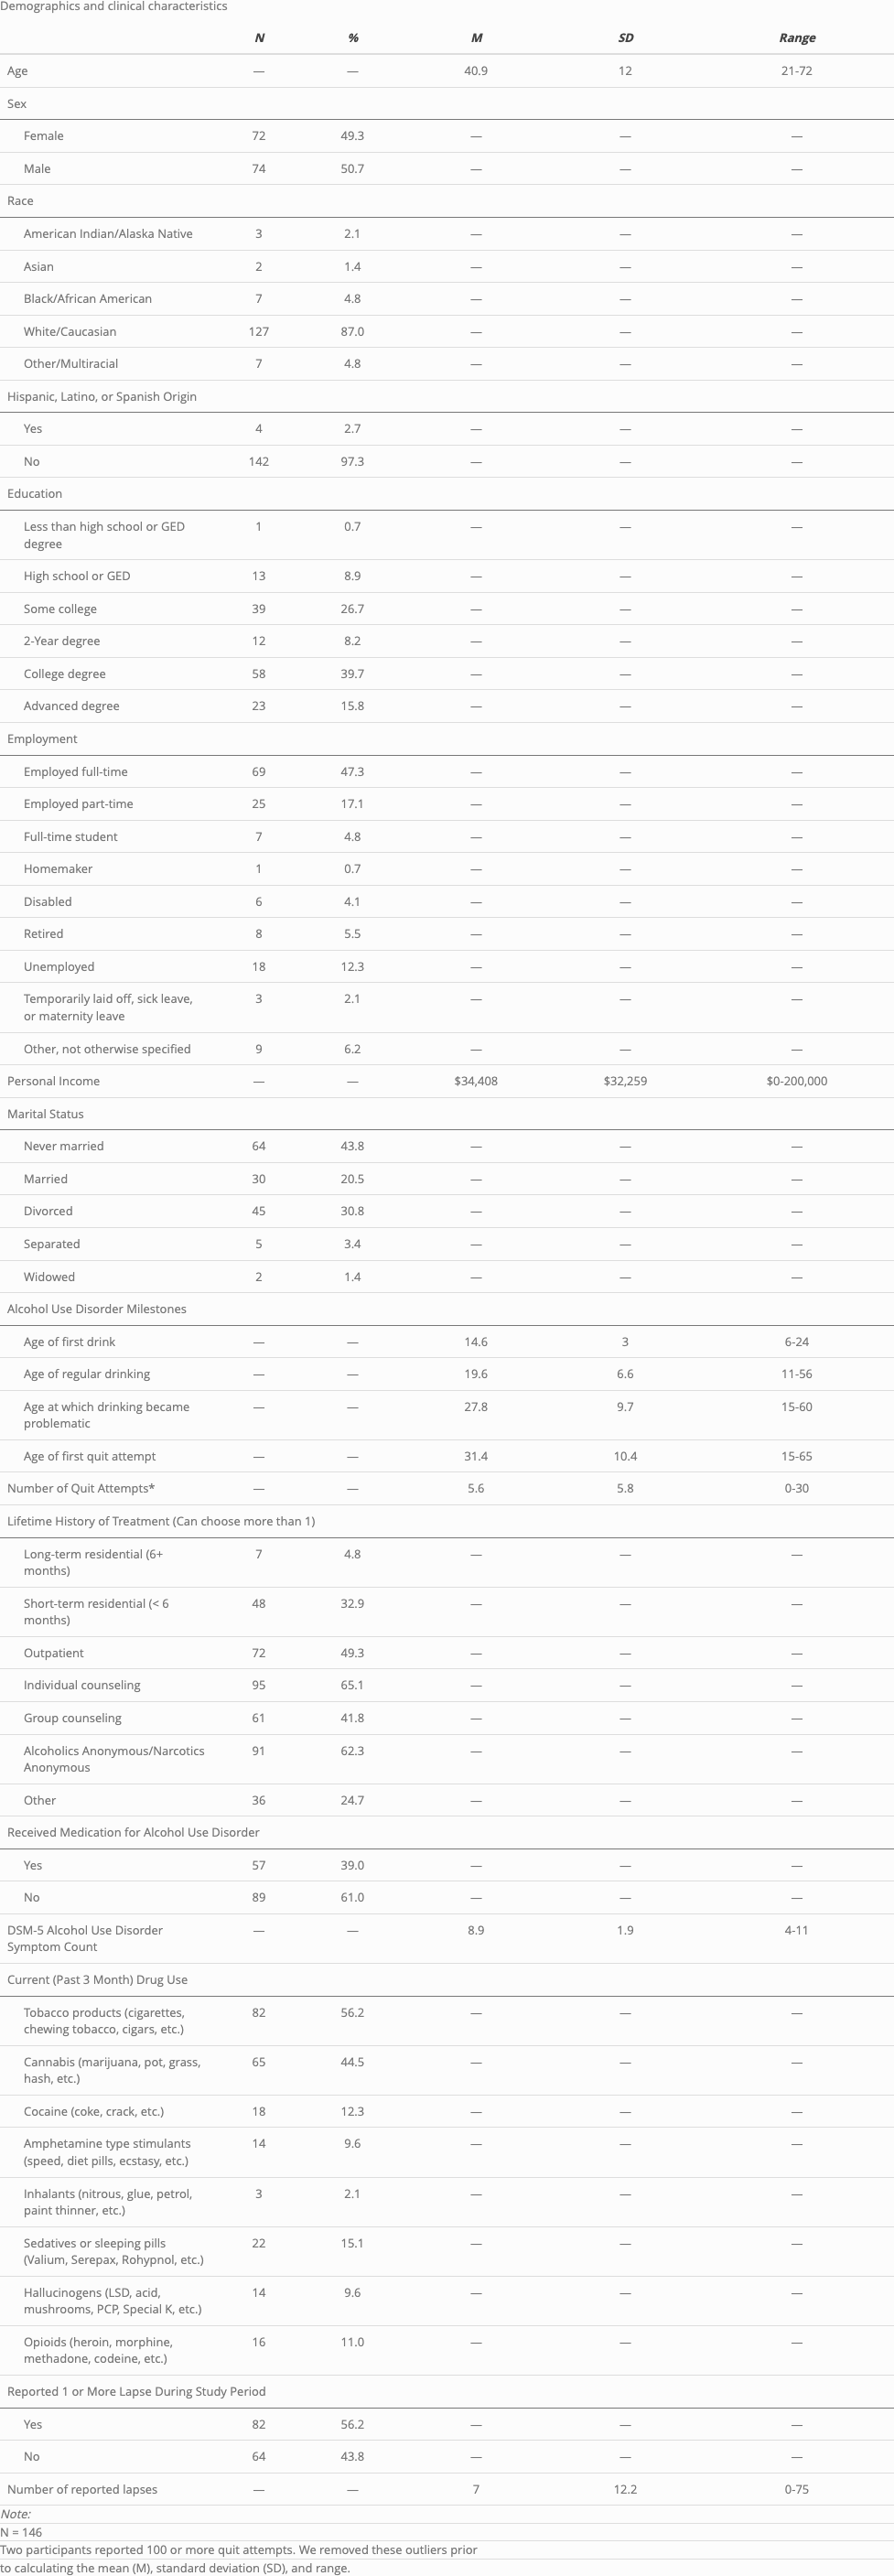{#tbl-demo-2 }

### Figure 1: auROC histogram

``` python
# auROCs |> 
#   ggplot(aes(x = auROC)) +
#   geom_histogram(bins = 10, fill = c("#af1f21")) +
#   geom_vline(xintercept = median(auROCs$auROC), color = c("#f29c96"), lwd = 1, linetype="longdash") +
#   labs(x = "auROC", y = "Frequency")
probs |> 
  ggplot(aes(x = roc_auc)) +
  geom_histogram(bins = 15, color = "white", fill = "#af1f21") +
  #geom_step(bins = 10, fill = c("#af1f21")) +
  #stat_bin(geom="step", bins = 10, color = c("#af1f21"), lwd = 1) +
  geom_vline(xintercept = median(probs$roc_auc), color = c("white"), lwd = .5, linetype="dashed") +
  scale_y_continuous(expand = c(0,0)) +
  labs(x = "auROC", y = "Frequency")
```

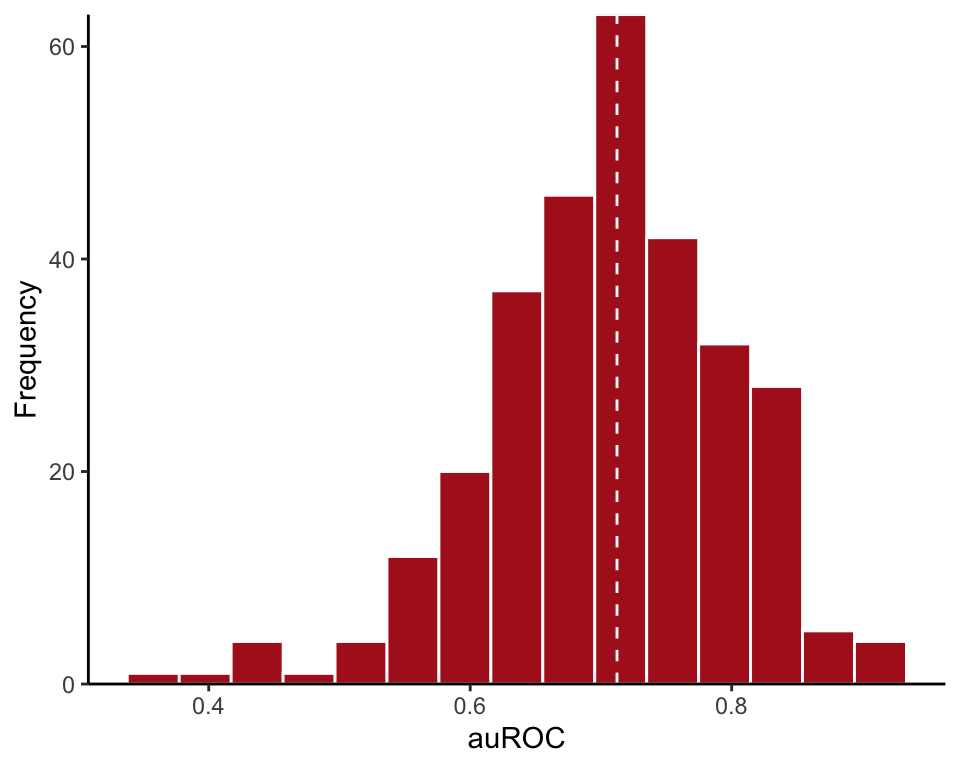

### Figure 2: Calibrated auROC plot

``` python
roc_data <- probs |> 
  roc_curve(prob_logi, truth = label)
  
plot_roc <- function(df, line_colors){
  df |> 
  ggplot(aes(x = 1 - specificity, y = sensitivity, color = model)) +
    geom_path(linewidth = 1.25) +
    geom_abline(lty = 3) +
    coord_fixed(xlim = c(0, 1), ylim = c(0, 1)) +
    labs(x = "False Positive Rate",
        y = "True Positive Rate") +
  scale_color_manual(values = line_colors)
}

roc_data |>
  mutate(sensitivity = round(sensitivity, 4),
         specificity = round(specificity, 4)) |>
  group_by(sensitivity, specificity) |> 
  summarise(.threshold = mean(.threshold)) |> 
  ggplot(aes(x = 1 - specificity, y = sensitivity, color = .threshold)) +
  #ggplot(aes(x = specificity, y = sensitivity, color = .threshold)) +
  geom_path(linewidth = 1) +
  geom_abline(lty = 3) +
  coord_fixed(xlim = c(0, 1), ylim = c(0, 1)) +
  labs(x = "False Positive Rate",
       y = "True Positive Rate") +
  scale_x_continuous(breaks = seq(0,1,.25),
    labels = sprintf("%.2f", seq(0,1,.25))) + # to flip axis
  scale_color_gradient(low="darkblue", high = "red", name = "Threshold") +
  theme(axis.text = element_text(size = rel(1.50)), 
        axis.title = element_text(size = rel(1.75)))
```

    `summarise()` has grouped output by 'sensitivity'. You can override using the
    `.groups` argument.

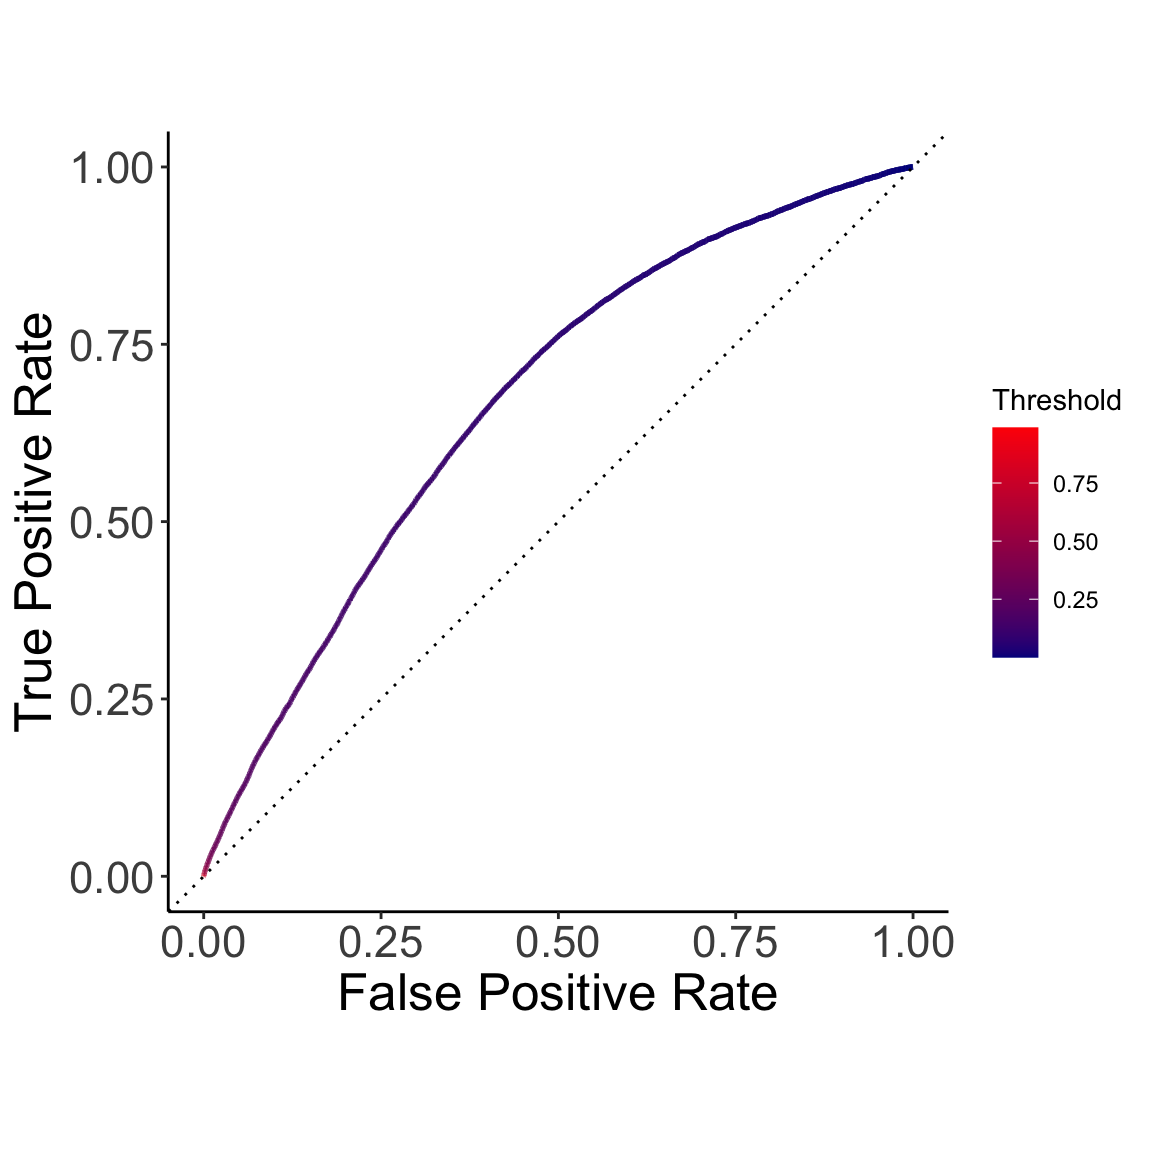

### Figure 3: auROC posterior probability distribution

``` python
pp_tidy <- pp |> 
  tidy(seed = 123)

q <- c(0.025, 0.5, 0.975)

ci_day <- pp_tidy |> 
  summarize(median = quantile(posterior, probs = q[2]),
            lower = quantile(posterior, probs = q[1]), 
            upper = quantile(posterior, probs = q[3])) |> 
  mutate(y = 30)

pp_tidy |> 
  ggplot(aes(x = posterior)) + 
  geom_density(color = "#af1f21", fill = "#af1f21", alpha = .85, lwd = .8) +
  #geom_segment(mapping = aes(y = y, yend = y, x = lower, xend = upper), color = c("#af1f21"),
                #data = ci_day, lwd = 1) +
  geom_vline(xintercept = ci_day$median, color = "white", lwd = .5, linetype="dashed") +
  geom_errorbar(aes(y = ci_day$y, xmin = ci_day$lower, xmax = ci_day$upper), color = "darkblue", lwd = .3) +
  geom_vline(xintercept = .5, lwd = .5, linetype="dotted") +
  scale_x_continuous(limits=c(0.49,.76)) +
  scale_y_continuous(expand = c(0,0)) +
  ylab("Posterior Probability Density") +
  xlab("Area Under ROC Curve")
```

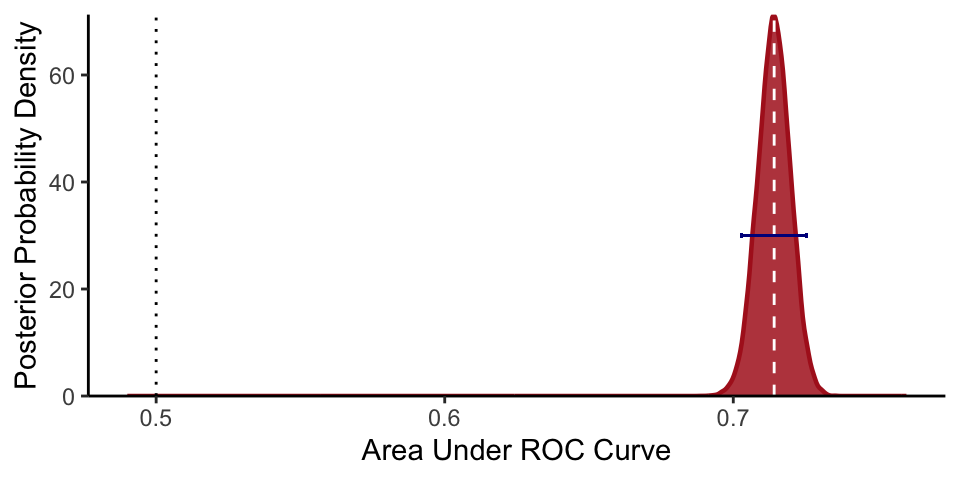

### Figure 4: Calibration plot

``` python
cols <- c("prob_raw" = "#FF9898FF", "prob_logi" = "#A91E45FF")

probs |>
  mutate(.pred_lapse = .pred_Lapse) |>
  filter(method == "prob_raw" | method == "prob_logi") |> 
  cal_plot_breaks(truth = label, 
                  estimate = .pred_lapse,
                  .by = method) +
  scale_color_manual(values = cols,
                     aesthetics = c("color", "fill")) +
  ylab("Observed Lapse Rate") +
  xlab("Predicted Lapse Probability (Bin Midpoint)") +
  facet_grid(~factor(method, levels=c('prob_raw','prob_logi'),
                     labels = c("Raw (Uncalibrated) Probability",
                                "Logistic (Calibrated) Probability"))) +
  scale_y_continuous(breaks = seq(0,1, by = .1),
                     limits = seq(0,1)) +
  scale_x_continuous(breaks = seq(0,1, by = .1),
                     limits = seq(0,1)) +
  theme_classic() +
  theme(legend.position="none")
```

    Scale for y is already present.
    Adding another scale for y, which will replace the existing scale.
    Scale for x is already present.
    Adding another scale for x, which will replace the existing scale.

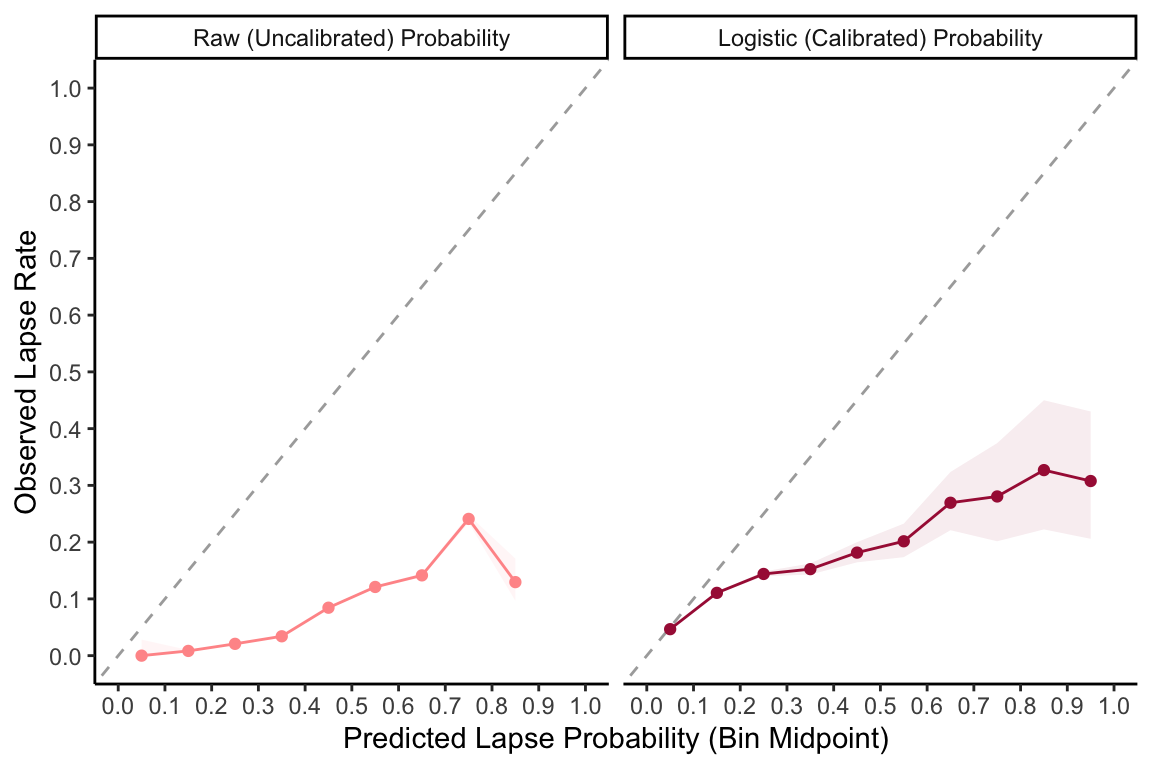

### Figure 5: Global Feature Importance

``` python
shaps_grp |>
  group_by(variable_grp) |>
  summarize(mean_value = (mean(abs(value)))) |> 
  mutate(group = reorder(variable_grp, mean_value)) |> #, sum)) |>
  #mutate(window = fct(window, levels = c("week", "day", "hour"))) |> 
  ggplot() +
  geom_bar(aes(x = group, y = mean_value), stat = "identity", fill = "#af1f21") +
  ylab("Mean |SHAP| value (in Log-Odds)") +
  xlab("") +
  coord_flip()
```

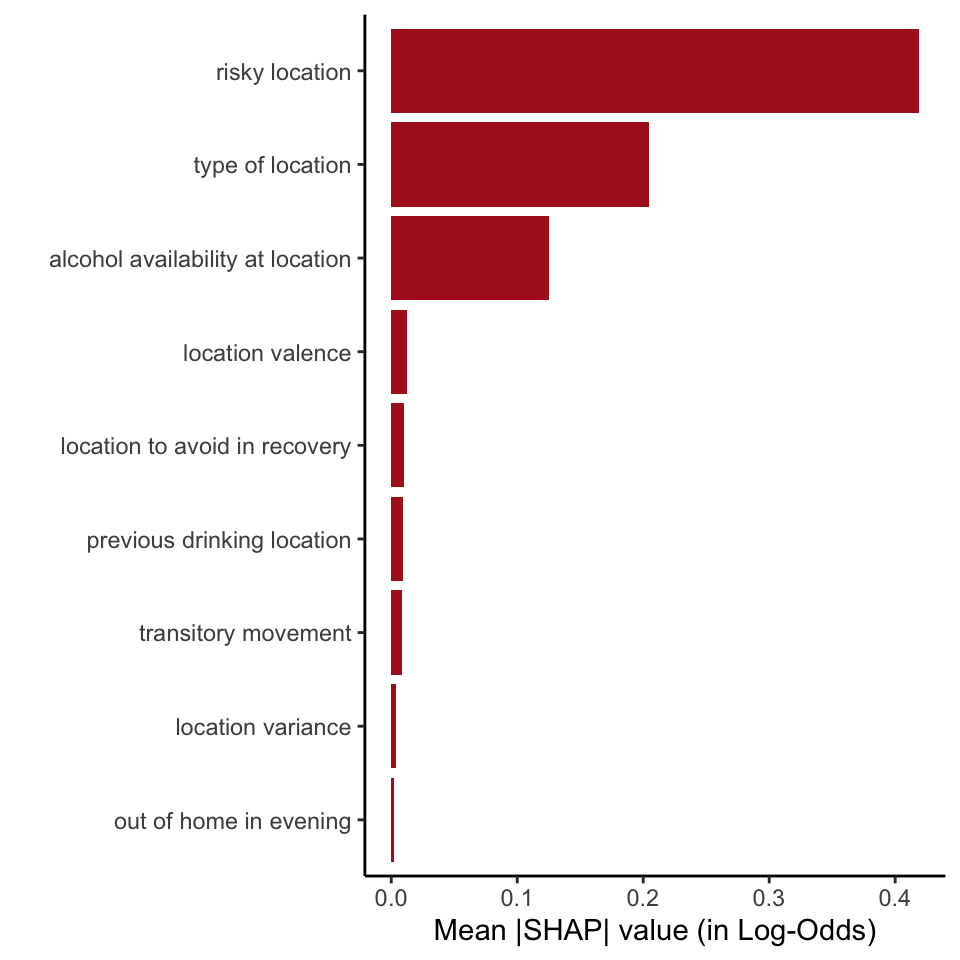

### Figure 6: Posterior probability distribution 95% credible intervals by subgroup

``` python
cowplot::plot_grid(fig_race, fig_sex, fig_age, fig_income, align="v", scale = 0.95)
```

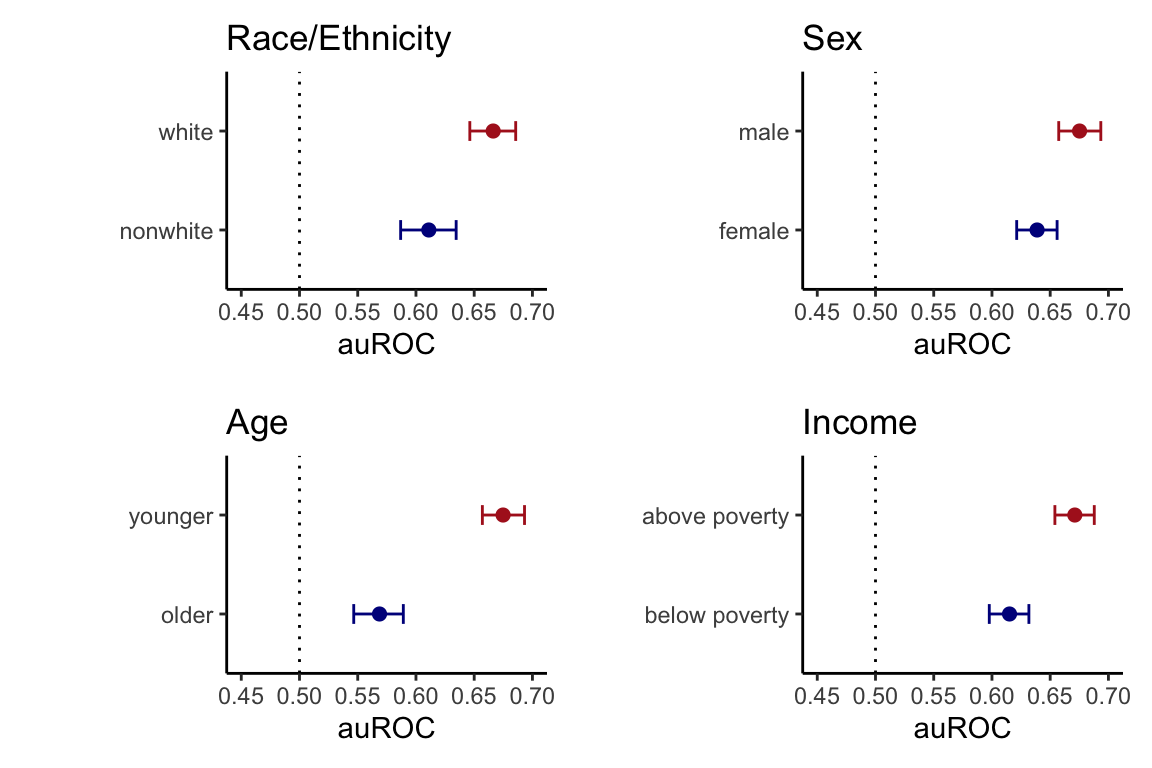